# Aggregations: Min, Max, and Everything In Between

## 배열의 합 구하기

In [3]:
import numpy as np

In [2]:
L = np.random.random(100)
sum(L)

55.61209116604941

In [3]:
np.sum(L)

55.612091166049424

두가지를 비교했을 때, Numpy sum이 속도가 더 빠르다

In [8]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

169 ms ± 5.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
443 µs ± 18.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Minimum and Maximum

In [11]:
min(big_array), max(big_array)

(2.770197178314504e-07, 0.9999997165786907)

In [12]:
np.min(big_array), np.max(big_array)

(2.770197178314504e-07, 0.9999997165786907)

In [13]:
%timeit min(big_array)
%timeit np.min(big_array)

101 ms ± 1.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
538 µs ± 12.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### 다차원 행렬 aggregation

In [14]:
M = np.random.random((3, 4))
print(M)

[[0.50282288 0.46859302 0.06948106 0.23568947]
 [0.64410804 0.54595737 0.5342355  0.99771091]
 [0.35127031 0.64052888 0.91159232 0.21325823]]


In [10]:
M.sum()

6.0850555667307118

axis = 0 은 열을 의미한다.

axis = 1 은 행

In [18]:
M.min(axis=0)

array([0.35127031, 0.46859302, 0.06948106, 0.21325823])

In [19]:
M.max(axis=1)

array([0.50282288, 0.99771091, 0.91159232])

### 그외 함수



|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |


## Example: 미국 대통령 평균 신장 구해보기

In [20]:
!head -4 data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [21]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [6]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


In [7]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # 플롯 스타일 설정

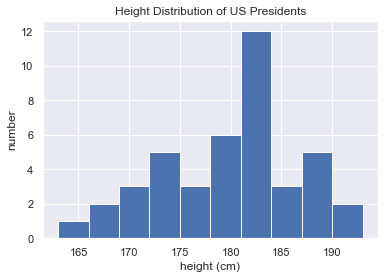

In [23]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');